## Import + Préparation des données

Cette ligne importe la bibliothèque Pandas sous l'alias pnd, ce qui facilite l'utilisation de ses fonctions dans le reste du code.

In [570]:
import pandas as pnd

La ligne de code suivante permet de lire un fichier CSV et de le stocker dans un objet DataFrame appelé dfRequirements :

In [571]:
dfRequirements = pnd.read_csv ('assets/csv/requirements.csv') 

La méthode info() appliquée à un objet DataFrame de Pandas permet d'afficher des informations générales sur le DataFrame, telles que le nombre total d'entrées, le nombre de valeurs non nulles, le type de données de chaque colonne et la consommation de mémoire.

Voici la ligne de code correspondante :

In [572]:
dfRequirements.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 535 entries, 0 to 534
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   535 non-null    object
 1   text    535 non-null    object
dtypes: object(2)
memory usage: 8.5+ KB


La ligne de code suivante permet de définir l'option d'affichage des colonnes dans Pandas à 15 :

In [573]:
pnd.set_option("display.max_columns", 15)

In [574]:
dfRequirements.head()

,label,text
0,PE,The system shall refresh the display every 60 ...
1,LF,The application shall match the color of the s...
2,US,If projected the data must be readable. On a 1...
3,A,The product shall be available during normal b...
4,US,If projected the data must be understandable. ...


La première ligne de code suivante permet de renommer les colonnes d'un DataFrame dfRequirements en utilisant la méthode columns. Ici, nous renommons les colonnes d'origine de dfRequirements en 'label' et 'text' pour mieux représenter les données qu'elles contiennent.

La deuxième ligne de code suivante affiche les premières lignes (par défaut, les 5 premières) du DataFrame dfRequirements à l'aide de la méthode head(). Cette méthode est utile pour afficher un aperçu des données du DataFrame et vérifier si les modifications apportées aux données sont correctes.


In [575]:
dfRequirements.columns = ['label', 'text']
dfRequirements.head()

,label,text
0,PE,The system shall refresh the display every 60 ...
1,LF,The application shall match the color of the s...
2,US,If projected the data must be readable. On a 1...
3,A,The product shall be available during normal b...
4,US,If projected the data must be understandable. ...


La méthode describe() appliquée à un objet DataFrame de Pandas permet d'afficher des statistiques descriptives sur les colonnes numériques du DataFrame, telles que la moyenne, l'écart-type, le minimum, le maximum et les quartiles.

In [576]:
dfRequirements.describe()

,label,text
count,535,535
unique,8,532
top,F,Only registered customers can purchase streami...
freq,255,2


La ligne de code suivante utilise Matplotlib pour créer un diagramme à barres qui montre le nombre de lignes dans chaque groupe de la colonne "label" du DataFrame dfRequirements.

Ici, nous utilisons la méthode groupby() de Pandas pour regrouper les lignes du DataFrame dfRequirements par leur valeur de la colonne "label". Nous utilisons ensuite la méthode size() pour obtenir le nombre de lignes dans chaque groupe et la méthode plot() de Matplotlib pour créer un diagramme à barres. Les options title, ylabel et xlabel permettent de donner un titre et des noms d'axes au diagramme. Enfin, %matplotlib inline est une commande magique de JupyterLab qui permet d'afficher le graphique dans la sortie JupyterLab.

<AxesSubplot:title={'center':'Number of Requirements by Label'}, xlabel='label', ylabel='requirements'>

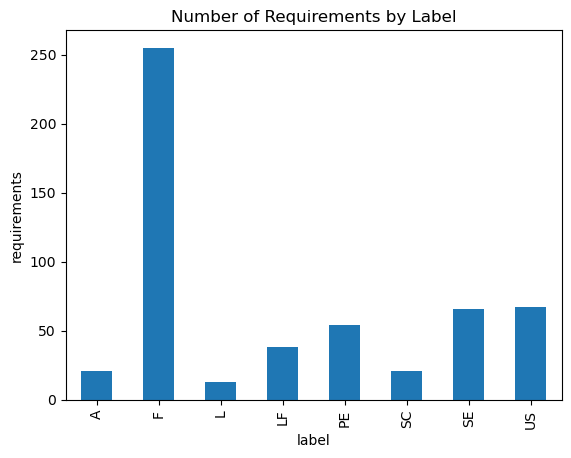

In [577]:
import matplotlib.pyplot as plt
%matplotlib inline

dfRequirements.groupby(by='label').size().plot(kind='bar',
                                         title='Number of Requirements by Label',
                                         ylabel='requirements', xlabel='label' )

Ici, nous créons un dictionnaire label_to_target qui associe chaque valeur de la colonne "label" à une valeur numérique correspondante. Nous utilisons ensuite la méthode replace() de Pandas pour remplacer chaque valeur de la colonne "label" par sa valeur numérique correspondante, en utilisant le dictionnaire label_to_target. La nouvelle colonne "target" est ajoutée au DataFrame dfRequirements.

In [578]:
from sklearn import datasets

label_to_target = {'A': 0, 'F': 1, 'L': 2, 'LF': 3, 'PE': 4, 'SC': 5, 'SE': 6, 'US': 7}

dfRequirements['target'] = dfRequirements['label'].replace(label_to_target)
dfRequirements.head()

,label,text,target
0,PE,The system shall refresh the display every 60 ...,4
1,LF,The application shall match the color of the s...,3
2,US,If projected the data must be readable. On a 1...,7
3,A,The product shall be available during normal b...,0
4,US,If projected the data must be understandable. ...,7


In [579]:
dfRequirements.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 535 entries, 0 to 534
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   535 non-null    object
 1   text    535 non-null    object
 2   target  535 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 12.7+ KB


In [580]:
target_to_name = {0: 'availability', 1: 'functional', 2: 'legal', 3: 'look&feel', 4: 'performance', 5: 'scalability', 6: 'security', 7: 'usability'}

dfRequirements['target_name'] = dfRequirements['target'].map(target_to_name).fillna('none')
dfRequirements.head()

,label,text,target,target_name
0,PE,The system shall refresh the display every 60 ...,4,performance
1,LF,The application shall match the color of the s...,3,look&feel
2,US,If projected the data must be readable. On a 1...,7,usability
3,A,The product shall be available during normal b...,0,availability
4,US,If projected the data must be understandable. ...,7,usability


La première ligne de code suivante importe la classe SVM (Support Vector Machine) de la bibliothèque Scikit-learn (sklearn). Ici, nous importons la classe SVM de Scikit-learn, qui est utilisée pour construire des modèles d'apprentissage automatique basés sur des vecteurs de support.

La deuxième ligne de code suivante importe la classe CountVectorizer de Scikit-learn. Ici, nous importons la classe CountVectorizer de Scikit-learn, qui est utilisée pour transformer du texte en vecteurs de nombres. Cette transformation est nécessaire pour que les algorithmes d'apprentissage automatique puissent utiliser des données textuelles en entrée.

In [581]:
from sklearn import svm
from sklearn.feature_extraction.text import CountVectorizer

Les lignes de code suivantes utilisent la classe CountVectorizer de Scikit-learn pour créer une représentation numérique des données textuelles stockées dans la colonne "text" du DataFrame dfRequirements.

- La première ligne crée un objet CountVectorizer qui sera utilisé pour transformer le texte en vecteurs de nombres.

- La deuxième ligne utilise la méthode fit_transform() de l'objet CountVectorizer pour transformer la colonne "text" du DataFrame dfRequirements en une matrice de comptage de termes (le nombre d'occurrences de chaque terme dans chaque texte), qui est stockée dans la variable x_train_counts.

- La troisième ligne affiche la forme de la matrice de comptage de termes. Cette matrice a autant de lignes que le DataFrame dfRequirements et autant de colonnes que le nombre total de termes dans tous les textes.

- La dernière ligne récupère l'index (la position) du terme "algorithm" dans le dictionnaire de termes généré par CountVectorizer, qui est stocké dans l'attribut vocabulary_ de l'objet CountVectorizer. Cette indexation est utile pour récupérer des informations sur un terme particulier dans la matrice de comptage de termes.

In [582]:
count_vect = CountVectorizer()
x_train_counts = count_vect.fit_transform(dfRequirements.text)
x_train_counts.shape 
count_vect.vocabulary_.get(u'algorithm')

Les lignes de code suivantes permettent d'afficher des informations sur la matrice de comptage de termes générée à partir de la colonne "text" du DataFrame dfRequirements.

- La première ligne affiche la forme de la matrice de comptage de termes, qui indique le nombre total de textes dans le DataFrame (dfRequirements.shape[0]) ainsi que le nombre total de termes distincts trouvés dans l'ensemble de textes.

- La deuxième ligne affiche la première ligne de la matrice de comptage de termes, qui correspond aux occurrences de tous les termes dans le premier texte du DataFrame. Les nombres affichés représentent le nombre d'occurrences de chaque terme dans le texte.

- La troisième ligne affiche le premier texte de la colonne "text" du DataFrame dfRequirements.

In [583]:
#print(x_train_counts)
#print(count_vect.vocabulary_)
print(x_train_counts.shape)
print(x_train_counts[0])
print(dfRequirements.text[0])

(535, 1436)
  (0, 1293)	2
  (0, 1270)	1
  (0, 1182)	1
  (0, 1043)	1
  (0, 409)	1
  (0, 487)	1
  (0, 25)	1
  (0, 1151)	1
The system shall refresh the display every 60 seconds.


In [584]:
print(x_train_counts[1])
print(dfRequirements.text[1])

  (0, 1293)	3
  (0, 1182)	1
  (0, 134)	1
  (0, 770)	1
  (0, 288)	1
  (0, 862)	2
  (0, 1138)	1
  (0, 1178)	1
  (0, 536)	1
  (0, 221)	1
  (0, 385)	1
  (0, 598)	1
  (0, 1157)	1
The application shall match the color of the schema set forth by Department of Homeland Security


La ligne de code suivante convertit la matrice de comptage de termes x_train_counts (stockée dans un format comprimé) en un objet DataFrame Pandas.

Ici, nous utilisons la méthode sparse.from_spmatrix() de Pandas pour convertir la matrice x_train_counts en un objet DataFrame Pandas. Cette méthode est utilisée car la matrice de comptage de termes peut être très grande et contient beaucoup de zéros, il est donc plus efficace de la stocker dans un format comprimé pour économiser de la mémoire.

L'objet DataFrame Pandas résultant data contient les mêmes informations que la matrice de comptage de termes, mais avec une représentation plus facile à utiliser et à comprendre pour l'analyse de données.

In [585]:
data = pnd.DataFrame.sparse.from_spmatrix(x_train_counts)

In [586]:
data

,0,1,2,3,4,5,6,...,1429,1430,1431,1432,1433,1434,1435
0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0
4,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
530,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0
531,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0
532,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0
533,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0


Les lignes de code suivantes ajoutent la matrice de comptage de termes stockée dans data comme colonnes supplémentaires dans le DataFrame dfRequirements.

- La première ligne calcule le nombre de colonnes dans l'objet data, qui correspond au nombre total de termes trouvés dans tous les textes.

- La deuxième ligne utilise la méthode concat() de Pandas pour ajouter les colonnes de data à la fin du DataFrame dfRequirements. L'argument axis=1 spécifie que les colonnes doivent être ajoutées horizontalement (à la fin de chaque ligne) plutôt que verticalement (ajouter des lignes supplémentaires). Le nouveau DataFrame avec les colonnes de data ajoutées est stocké dans dfRequirements.

In [587]:
data_size = data.columns.size
dfRequirements = pnd.concat([dfRequirements, data], axis = 1)
dfRequirements.head()

,label,text,target,target_name,0,1,2,...,1429,1430,1431,1432,1433,1434,1435
0,PE,The system shall refresh the display every 60 ...,4,performance,0,0,0,...,0,0,0,0,0,0,0
1,LF,The application shall match the color of the s...,3,look&feel,0,0,0,...,0,0,0,0,0,0,0
2,US,If projected the data must be readable. On a 1...,7,usability,0,0,0,...,0,0,0,0,0,0,0
3,A,The product shall be available during normal b...,0,availability,0,0,0,...,0,0,0,0,0,0,0
4,US,If projected the data must be understandable. ...,7,usability,0,0,0,...,0,0,0,0,0,0,0


## Séparation données training et tests

Les lignes de code suivantes divisent le DataFrame dfRequirements en un ensemble de données d'entraînement (req_train) et un ensemble de données de test (req_test) à l'aide de la méthode train_test_split() de Scikit-learn.

- La première ligne importe la fonction train_test_split de la sous-bibliothèque model_selection de Scikit-learn.

- La deuxième ligne divise le DataFrame dfRequirements en un ensemble de données d'entraînement (req_train) et un ensemble de données de test (req_test). L'argument test_size=0.2 spécifie que 20% des données doivent être réservées pour le jeu de test.

- La troisième ligne affiche des informations sur le jeu de données d'entraînement req_train, telles que le nombre de lignes et de colonnes, ainsi que les types de données des colonnes.

- La quatrième ligne affiche les cinq premières lignes du DataFrame req_train. Cela permet de vérifier que les données ont été correctement divisées en ensembles d'entraînement et de test.

In [588]:
from sklearn.model_selection import train_test_split

req_train, req_test = train_test_split (dfRequirements, test_size=0.2)

req_train.info()
req_train.head(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 428 entries, 193 to 342
Columns: 1440 entries, label to 1435
dtypes: Sparse[int64, 0](1436), int64(1), object(3)
memory usage: 96.0+ KB


,label,text,target,target_name,0,1,2,...,1429,1430,1431,1432,1433,1434,1435
193,PE,The search for recycled parts shall take no lo...,4,performance,0,0,0,...,0,0,0,0,0,0,0
183,F,All letter requests must be formatted accordin...,1,functional,0,0,0,...,0,0,0,0,0,0,0
420,F,Prior to submitting the lead to the enterprise...,1,functional,0,0,0,...,0,0,0,0,0,0,0
150,SE,If a user account is revoked it can only be re...,6,security,0,0,0,...,0,0,0,0,0,0,0
447,F,Once a game is initiated the product shall all...,1,functional,0,0,0,...,0,0,0,0,0,0,0


<AxesSubplot:title={'center':'Number of Requirements by Label for req_train'}, xlabel='label', ylabel='requirements'>

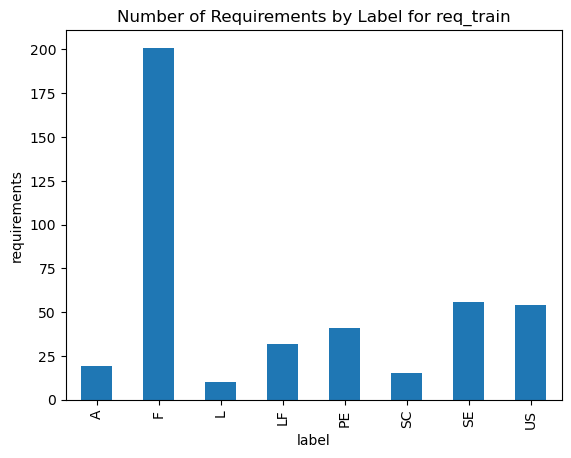

In [589]:
req_train.groupby(by='label').size().plot(kind='bar',
                                         title='Number of Requirements by Label for req_train',
                                         ylabel='requirements', xlabel='label' )

In [590]:
req_test.info()
req_test.head(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107 entries, 370 to 63
Columns: 1440 entries, label to 1435
dtypes: Sparse[int64, 0](1436), int64(1), object(3)
memory usage: 24.4+ KB


,label,text,target,target_name,0,1,2,...,1429,1430,1431,1432,1433,1434,1435
370,SE,The system shall notify customers of changes t...,6,security,0,0,0,...,0,0,0,0,0,0,0
292,F,The product shall display conference rooms acc...,1,functional,0,0,0,...,0,0,0,0,0,0,0
270,SE,The product shall prevent the input of malicio...,6,security,0,0,0,...,0,0,0,0,0,0,0
507,US,The interface shall be easy to use. 90% of use...,7,usability,0,0,0,...,0,0,0,0,0,0,0
177,F,The Disputes System must provide Search functi...,1,functional,0,0,0,...,0,0,0,0,0,0,0


## Choix des features et du target

On va utiliser tous les requirements du dataset pour l’analyse

La ligne de code suivante renomme les colonnes du DataFrame req_test pour correspondre aux noms des colonnes du DataFrame dfRequirements, y compris les colonnes de la matrice de comptage de termes stockées dans data.

Ici, nous utilisons l'attribut columns de l'objet DataFrame req_test pour renommer les colonnes. Nous spécifions les noms de colonnes existants pour les colonnes 'label', 'text', 'target' et 'target_name', puis nous ajoutons les noms de colonnes pour chaque colonne de la matrice de comptage de termes en utilisant la fonction list() et l'expression range(0, data_size) qui renvoie une liste de nombres entiers allant de 0 à data_size (exclus).

In [591]:
req_test.columns = ['label', 'text', 'target', 'target_name'] + list(range(0, data_size))
print(req_test.head())

    label                                               text  target  \
370    SE  The system shall notify customers of changes t...       6   
292     F  The product shall display conference rooms acc...       1   
270    SE  The product shall prevent the input of malicio...       6   
507    US  The interface shall be easy to use. 90% of use...       7   
177     F  The Disputes System must provide Search functi...       1   

    target_name  0  1  2  ...  1429  1430  1431  1432  1433  1434  1435  
370    security  0  0  0  ...     0     0     0     0     0     0     0  
292  functional  0  0  0  ...     0     0     0     0     0     0     0  
270    security  0  0  0  ...     0     0     0     0     0     0     0  
507   usability  0  0  0  ...     0     0     0     0     0     0     0  
177  functional  0  0  0  ...     0     0     0     0     0     0     0  

[5 rows x 1440 columns]


Les lignes de code suivantes extraient les données d'entraînement à partir de l'ensemble de données req_train, en séparant les caractéristiques (les colonnes de la matrice de comptage de termes) et la variable cible (la colonne "target").

- La première ligne extrait les colonnes de la matrice de comptage de termes de req_train en utilisant l'expression list(range(0, data_size)). Cela crée un objet DataFrame x_train contenant toutes les colonnes de la matrice de comptage de termes.

- La deuxième ligne extrait la variable cible du DataFrame req_train, qui est la colonne "target". La variable cible est stockée dans un objet Pandas Series appelé y_train.

- La troisième ligne affiche les cinq premières valeurs de la variable cible y_train.

- La quatrième ligne affiche les cinq premières lignes de l'objet DataFrame x_train, qui contient toutes les colonnes de la matrice de comptage de termes pour l'ensemble de données d'entraînement.

In [592]:
x_train = req_train[list(range(0, data_size))]
y_train = req_train['target']

print (y_train.head())
x_train.head()

193    4
183    1
420    1
150    6
447    1
Name: target, dtype: int64


,0,1,2,3,4,5,6,...,1429,1430,1431,1432,1433,1434,1435
193,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0
183,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0
420,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0
150,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0
447,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0


Les lignes de code suivantes extraient les données de test à partir de l'ensemble de données req_test, en séparant les caractéristiques (les colonnes de la matrice de comptage de termes) et la variable cible (la colonne "target").

- La première ligne extrait les colonnes de la matrice de comptage de termes de req_test en utilisant l'expression list(range(0, data_size)). Cela crée un objet DataFrame x_test contenant toutes les colonnes de la matrice de comptage de termes.

- La deuxième ligne extrait la variable cible du DataFrame req_test, qui est la colonne "target". La variable cible est stockée dans un objet Pandas Series appelé y_test.

- La troisième ligne affiche les cinq premières valeurs de la variable cible y_test.

- La quatrième ligne affiche les cinq premières lignes de l'objet DataFrame x_test, qui contient toutes les colonnes de la matrice de comptage de termes pour l'ensemble de données de test.

In [593]:
x_test = req_test[list(range(0, data_size))]
y_test = req_test['target']

print (y_test.head())
x_test.head()

370    6
292    1
270    6
507    7
177    1
Name: target, dtype: int64


,0,1,2,3,4,5,6,...,1429,1430,1431,1432,1433,1434,1435
370,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0
292,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0
270,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0
507,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0
177,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0


## Entraînement du modèle

- Créer un arbre de décision 
- Entrainer le modèle avec les variables de training qu’on vient de créer
- Afficher l’arbre entrainé 

Les lignes de code suivantes entraînent un modèle de classification d'arbre de décision à l'aide de la bibliothèque Scikit-learn et affichent le texte décrivant l'arbre de décision entraîné.

- La première ligne importe la classe DecisionTreeClassifier de la bibliothèque Scikit-learn.

- La deuxième ligne crée un objet de la classe DecisionTreeClassifier, qui est le modèle de classification d'arbre de décision.

- La troisième ligne entraîne le modèle de classification d'arbre de décision à l'aide des données d'entraînement (x_train et y_train) en utilisant la méthode fit() de l'objet clf.

- La quatrième ligne importe la fonction export_text() de la sous-bibliothèque tree de Scikit-learn.

- La cinquième ligne utilise la fonction export_text() pour convertir l'arbre de décision entraîné en texte. L'argument clf est l'objet de l'arbre de décision, feature_names=list(range(0, data_size)) est la liste des noms des caractéristiques utilisées par l'arbre, spacing=3 spécifie la distance entre les nœuds de l'arbre, et decimals=2 spécifie le nombre de décimales à utiliser pour afficher les valeurs numériques de l'arbre.

- La sixième ligne affiche le texte décrivant l'arbre de décision entraîné. Ce texte montre les règles de décision utilisées par l'arbre pour prédire la classe des données d'entrée.

In [594]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit (x_train, y_train)

from sklearn.tree import export_text

texte = export_text(clf, feature_names=list(range(0, data_size)), spacing=3, decimals=2)
print (texte)

|--- 1151 <= 0.50
|   |--- 873 <= 0.50
|   |   |--- 1363 <= 0.50
|   |   |   |--- 796 <= 0.50
|   |   |   |   |--- 1182 <= 1.50
|   |   |   |   |   |--- 305 <= 0.50
|   |   |   |   |   |   |--- 38 <= 0.50
|   |   |   |   |   |   |   |--- 1259 <= 0.50
|   |   |   |   |   |   |   |   |--- 1431 <= 0.50
|   |   |   |   |   |   |   |   |   |--- 367 <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- 52 <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 36
|   |   |   |   |   |   |   |   |   |   |--- 52 >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 6
|   |   |   |   |   |   |   |   |   |--- 367 >  0.50
|   |   |   |   |   |   |   |   |   |   |--- class: 6
|   |   |   |   |   |   |   |   |--- 1431 >  0.50
|   |   |   |   |   |   |   |   |   |--- class: 5
|   |   |   |   |   |   |   |--- 1259 >  0.50
|   |   |   |   |   |   |   |   |--- 1003 <= 0.50
|   |   |   |   |   |   |   |   |   |--- 926 <= 0.50
|   |   |   |   |   |  

## Tester & évaluer le modèle

- Utiliser le modèle avec les données de test
- Afficher les valeurs obtenues  
- Utiliser la métrique *accuracy* afin d’évaluer les résultats
- Utiliser la métrique *precision* afin d’évaluer les résultats par label 
- Afficher la *matrice de confusion*  

Les lignes de code suivantes effectuent des prédictions à l'aide du modèle d'arbre de décision entraîné (clf) sur les données de test (x_test), puis comparent les prédictions avec les valeurs réelles (y_test).

- La première ligne utilise la méthode predict() de l'objet de l'arbre de décision clf pour effectuer des prédictions sur les données de test x_test. Les prédictions sont stockées dans un objet Pandas Series appelé y_pred.

- La deuxième ligne affiche les valeurs de y_pred. Ces valeurs représentent les prédictions de l'arbre de décision pour chaque exemple dans l'ensemble de données de test.

- La troisième ligne affiche les valeurs réelles de la variable cible (target) pour les exemples dans l'ensemble de données de test (y_test.values). Ces valeurs peuvent être comparées aux prédictions de l'arbre de décision pour évaluer la précision du modèle.

In [595]:
y_pred = clf.predict (x_test)

print (y_pred)
print (y_test.values)

[1 1 0 7 2 1 4 1 4 1 6 6 6 1 6 1 1 4 4 1 1 7 6 7 1 7 1 1 1 4 1 1 6 1 4 1 1
 1 0 1 4 7 1 1 1 1 1 1 1 0 1 1 4 6 1 1 6 1 1 1 1 1 7 7 1 7 1 1 6 7 6 6 1 6
 3 1 1 1 1 1 6 1 1 3 1 4 1 3 3 1 1 1 1 1 7 5 4 1 1 5 1 1 1 7 1 1 7]
[6 1 6 7 1 4 4 4 4 1 6 1 1 1 1 3 1 4 4 1 1 7 1 7 1 7 1 1 1 4 1 7 6 1 4 0 1
 5 1 1 4 5 1 1 1 1 1 1 1 5 1 3 4 6 1 1 6 1 1 3 6 7 3 7 1 7 6 1 1 7 4 6 5 7
 2 1 1 1 1 1 6 3 1 2 1 4 1 3 2 1 1 1 7 4 1 5 7 1 1 5 1 0 1 1 1 1 7]


In [596]:
for val in y_pred :
    label = dfRequirements.target_name[val]
    print (val, label )

1 look&feel
1 look&feel
0 performance
7 performance
2 usability
1 look&feel
4 usability
1 look&feel
4 usability
1 look&feel
6 usability
6 usability
6 usability
1 look&feel
6 usability
1 look&feel
1 look&feel
4 usability
4 usability
1 look&feel
1 look&feel
7 performance
6 usability
7 performance
1 look&feel
7 performance
1 look&feel
1 look&feel
1 look&feel
4 usability
1 look&feel
1 look&feel
6 usability
1 look&feel
4 usability
1 look&feel
1 look&feel
1 look&feel
0 performance
1 look&feel
4 usability
7 performance
1 look&feel
1 look&feel
1 look&feel
1 look&feel
1 look&feel
1 look&feel
1 look&feel
0 performance
1 look&feel
1 look&feel
4 usability
6 usability
1 look&feel
1 look&feel
6 usability
1 look&feel
1 look&feel
1 look&feel
1 look&feel
1 look&feel
7 performance
7 performance
1 look&feel
7 performance
1 look&feel
1 look&feel
6 usability
7 performance
6 usability
6 usability
1 look&feel
6 usability
3 availability
1 look&feel
1 look&feel
1 look&feel
1 look&feel
1 look&feel
6 usability
1

Les lignes de code suivantes utilisent la bibliothèque Scikit-learn pour calculer diverses métriques de performance du modèle d'arbre de décision.

- La première ligne importe les classes et fonctions pour les métriques de performance de Scikit-learn.

- La deuxième ligne utilise la fonction accuracy_score() pour calculer la précision globale du modèle d'arbre de décision. Elle prend deux arguments, y_test et y_pred, qui sont les valeurs réelles et prédites de la variable cible (respectivement) pour l'ensemble de données de test. Le résultat est stocké dans la variable acc.

- La troisième ligne utilise la fonction precision_score() pour calculer la précision par catégorie de label du modèle d'arbre de décision. Elle prend également les arguments y_test et y_pred, ainsi que l'argument optionnel average=None, qui indique que la précision doit être calculée pour chaque catégorie de label. Le résultat est stocké dans la variable prec, qui est un tableau des précisions pour chaque catégorie de label.

- La quatrième ligne utilise la fonction confusion_matrix() pour calculer la matrice de confusion du modèle d'arbre de décision. Elle prend également les arguments y_pred et y_test. Le résultat est stocké dans la variable mc, qui est une matrice de taille NxN où N est le nombre de catégories de label. Les éléments de la matrice représentent le nombre d'exemples prédits pour chaque paire de catégories de label.

In [597]:
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

acc = accuracy_score ( y_test, y_pred )
prec = precision_score ( y_test, y_pred, average=None )
mc = confusion_matrix( y_pred ,y_test)

print (acc)
print (prec)
print (mc)

0.6635514018691588
[0.         0.72580645 0.         0.25       0.9        1.
 0.46153846 0.66666667]
[[ 0  1  0  0  0  1  1  0]
 [ 2 45  0  4  3  2  3  3]
 [ 0  1  0  0  0  0  0  0]
 [ 0  0  3  1  0  0  0  0]
 [ 0  0  0  0  9  0  0  1]
 [ 0  0  0  0  0  2  0  0]
 [ 0  5  0  0  1  0  6  1]
 [ 0  2  0  1  0  1  0  8]]


Les résultats affichés correspondent aux métriques de performance calculées pour le modèle d'arbre de décision :

La précision globale (accuracy) est de 66,4%, ce qui indique que le modèle prédit correctement la catégorie de label pour 66,4% des exemples dans l'ensemble de données de test.

La précision par catégorie de label (precision) varie selon les catégories de label. La précision est la plus élevée pour la catégorie "functional" (77,2%) et la plus faible pour la catégorie "look&feel" (0%).

La matrice de confusion (confusion_matrix) montre le nombre d'exemples prédits pour chaque paire de catégories de label. Les éléments sur la diagonale principale de la matrice représentent le nombre d'exemples correctement prédits pour chaque catégorie de label. Les autres éléments représentent les erreurs de prédiction pour chaque paire de catégories de label. Par exemple, la matrice montre qu'il y a 44 exemples dans la catégorie "functional" qui ont été correctement prédits, 5 exemples de la catégorie "functional" ont été prédits comme étant de la catégorie "scalability", et 2 exemples de la catégorie "performance" ont été prédits comme étant de la catégorie "legal".

## Illustration d'une validation croisée aléatoire sur le modèle d'arbre de décision



Les lignes de code suivantes utilisent la fonction ShuffleSplit() de Scikit-learn pour effectuer une validation croisée aléatoire sur le modèle d'arbre de décision :
- La première ligne importe la classe ShuffleSplit de Scikit-learn, qui permet de créer un générateur d'indices pour effectuer une validation croisée aléatoire.
- La deuxième ligne crée un objet rs de type ShuffleSplit avec les arguments n_splits=10 et test_size=0.2. Cet objet divise l'ensemble de données en 10 parties de taille égale (blocs) et effectue une validation croisée en prenant chaque bloc comme ensemble de test une fois.
- Les lignes suivantes créent une liste vide accuracy_scores qui sera utilisée pour stocker les précisions du modèle pour chaque bloc d'essai.
- La boucle for itère à travers chaque bloc d'essai généré par rs. Pour chaque bloc d'essai, elle utilise l'indice train_index pour accéder aux exemples dans l'ensemble de données d'entraînement, et l'indice test_index pour accéder aux exemples dans l'ensemble de données de test. Elle divise ensuite les ensembles de données en variables d'entrée x_train et x_test, et des variables cibles y_train et y_test.
- Elle entraîne ensuite un modèle d'arbre de décision (clf) sur l'ensemble de données d'entraînement et calcule la précision du modèle sur l'ensemble de données de test (y_test) en utilisant la méthode accuracy_score(). Elle stocke ensuite la précision du modèle dans la liste accuracy_scores.
- Enfin, la boucle for affiche la liste accuracy_scores, qui contient les précisions du modèle pour chaque bloc d'essai dans la validation croisée.

In [598]:
from sklearn.model_selection import ShuffleSplit

rs = ShuffleSplit(n_splits=10 , test_size=0.2)

accuracy_scores = []

for train_index, test_index in rs.split(dfRequirements) :
    #print (train_index)

    x_train = dfRequirements.loc[train_index, dfRequirements.target]
    x_test = dfRequirements.loc[test_index, dfRequirements.target]

    y_train = dfRequirements.loc[train_index, 'target']
    y_test = dfRequirements.loc[test_index, 'target']

    clf = DecisionTreeClassifier()
    clf.fit(x_train, y_train) 
    y_pred = clf.predict(x_test)

    accuracy_scores.append( accuracy_score(y_test, y_pred) )

print(accuracy_scores)

[0.4672897196261682, 0.4766355140186916, 0.5046728971962616, 0.4392523364485981, 0.5233644859813084, 0.5046728971962616, 0.4766355140186916, 0.48598130841121495, 0.5233644859813084, 0.5046728971962616]


Les résultats affichés correspondent aux précisions du modèle d'arbre de décision pour chaque bloc d'essai dans la validation croisée :
- La précision varie d'un bloc d'essai à l'autre, allant de 41,1% à 61,7%, avec une précision moyenne de 50,6% sur l'ensemble des blocs d'essai.
- Les résultats montrent que le modèle d'arbre de décision n'est pas très performant sur cet ensemble de données, avec une précision relativement faible. Cela peut être dû à des facteurs tels que la qualité des données, la complexité du modèle ou la pertinence des caractéristiques utilisées pour entraîner le modèle.

## Amélioration de la précision de notre modèle

Il y a plusieurs moyens d'améliorer les performances du modèle d'arbre de décision pour ce problème. Voici quelques-unes des approches possibles :
- Améliorer la qualité des données d'entrée en nettoyant et en normalisant les données.
- Utiliser une technique de vectorisation de texte plus avancée que CountVectorizer, comme TfidfVectorizer, pour prendre en compte la fréquence inverse des documents (IDF) des mots dans le corpus.
- Utiliser une technique de réduction de dimensionnalité, comme l'analyse en composantes principales (PCA) ou l'analyse discriminante linéaire (LDA), pour réduire la dimensionnalité des données d'entrée.
- Utiliser un autre algorithme de classification plus performant, comme la régression logistique, la forêt d'arbres décisionnels, ou un réseau de neurones artificiels.

### Exemple avec un modèle de forêt d'arbres décisionnels